In [1]:
import pydocx
from bs4 import BeautifulSoup
import re
import codecs
import pymysql

import sys

In [36]:
f = open("../test0.html", "w", encoding="utf8")
f_t = open("../test0.txt", "w", encoding="utf8")

In [37]:
html = pydocx.PyDocX.to_html('../data/test0.docx')
print(html, file=f)
soup = BeautifulSoup(html)

In [38]:
f.close()

In [39]:
p_list = soup.select('p')  #标签选择器
print(len(p_list))

8


In [40]:
def parse_p(p):
    if str(p).find("img") != -1:
        return (0, "pic")
    else:
        return (1, "book")

In [41]:
parse_p(p_list[0])

(1, 'book')

In [42]:
this = p_list[1]

In [46]:
this_chinese = this.next_element
this_chinese[-1]

'年'

child 1 岁年
child 2 
child 3 廿
child 4 
child 5 五  
child 6 
child 7  

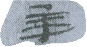
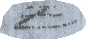

In [44]:
flag=0
for i in this.children:
    flag+=1
    print("child", flag, i)

In [54]:
flag = 0
# if the pre_stage = 1 means that the situation is booknum, 0 means the pictures
pre_stage = 0
for p in p_list:
    if flag%2 == 0:
        if parse_p(p)[0] == 1:
            if parse_p(p)[0] != pre_stage:
                pass
            else:
                print(flag, p.text)
                break
        else:
            print(flag, p.text)
            break    
    else:
        pass
    flag += 1

In [60]:
import pypandoc
output = pypandoc.convert_file('../test0.html', 'docx', outputfile="out.docx")